In [60]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#importing the svm model lib
from sklearn.svm import SVC
# import metric libraries
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Data collection and Processing
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [13]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [15]:
data_frame = pd.DataFrame(breast_cancer_dataset.data)

In [16]:
print(data_frame)

        0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20  

In [17]:
data_frame = pd.DataFrame(columns = breast_cancer_dataset.feature_names)

In [18]:
print(data_frame)

Empty DataFrame
Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension]
Index: []

[0 rows x 30 columns]


In [19]:
#add the data and the columns
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [20]:
print(data_frame)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [22]:
# we are adding the label column to denote the maligant and the non-maligant
# Maligant means the cells with value = 1 are cancerous and non means 0 with non cancerous
data_frame['label'] = breast_cancer_dataset.target
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [23]:
#statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [31]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


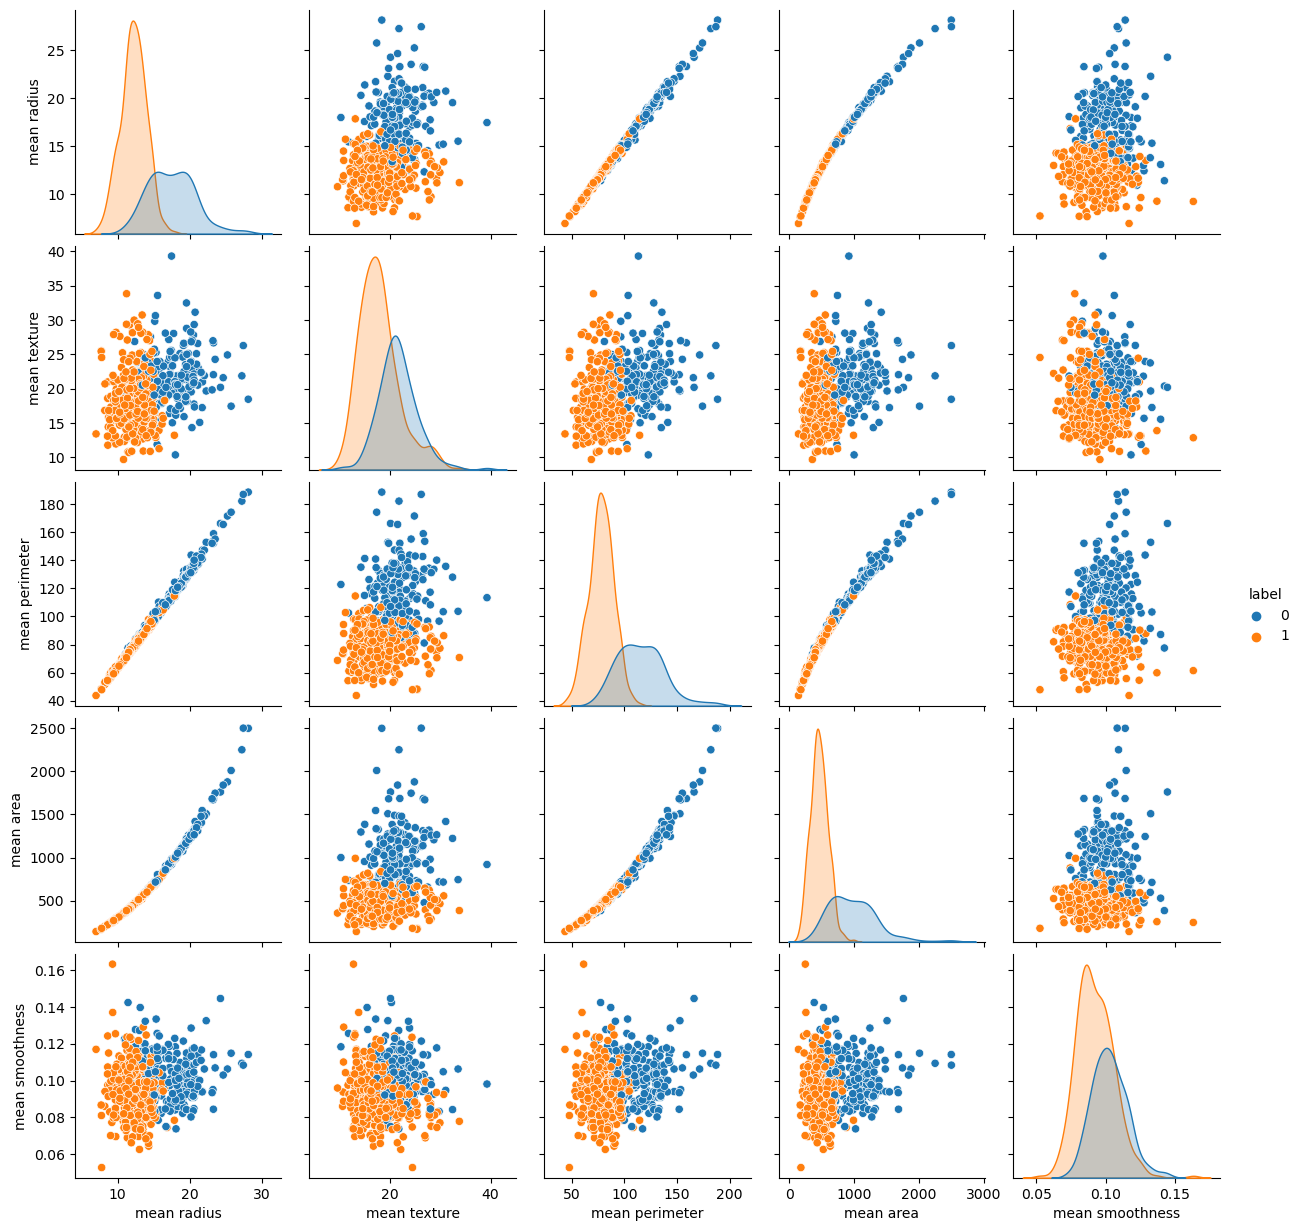

In [28]:
sns.pairplot(data_frame, hue = 'label', vars=['mean radius', 'mean texture','mean perimeter', 'mean area', 'mean smoothness'])

<AxesSubplot:>

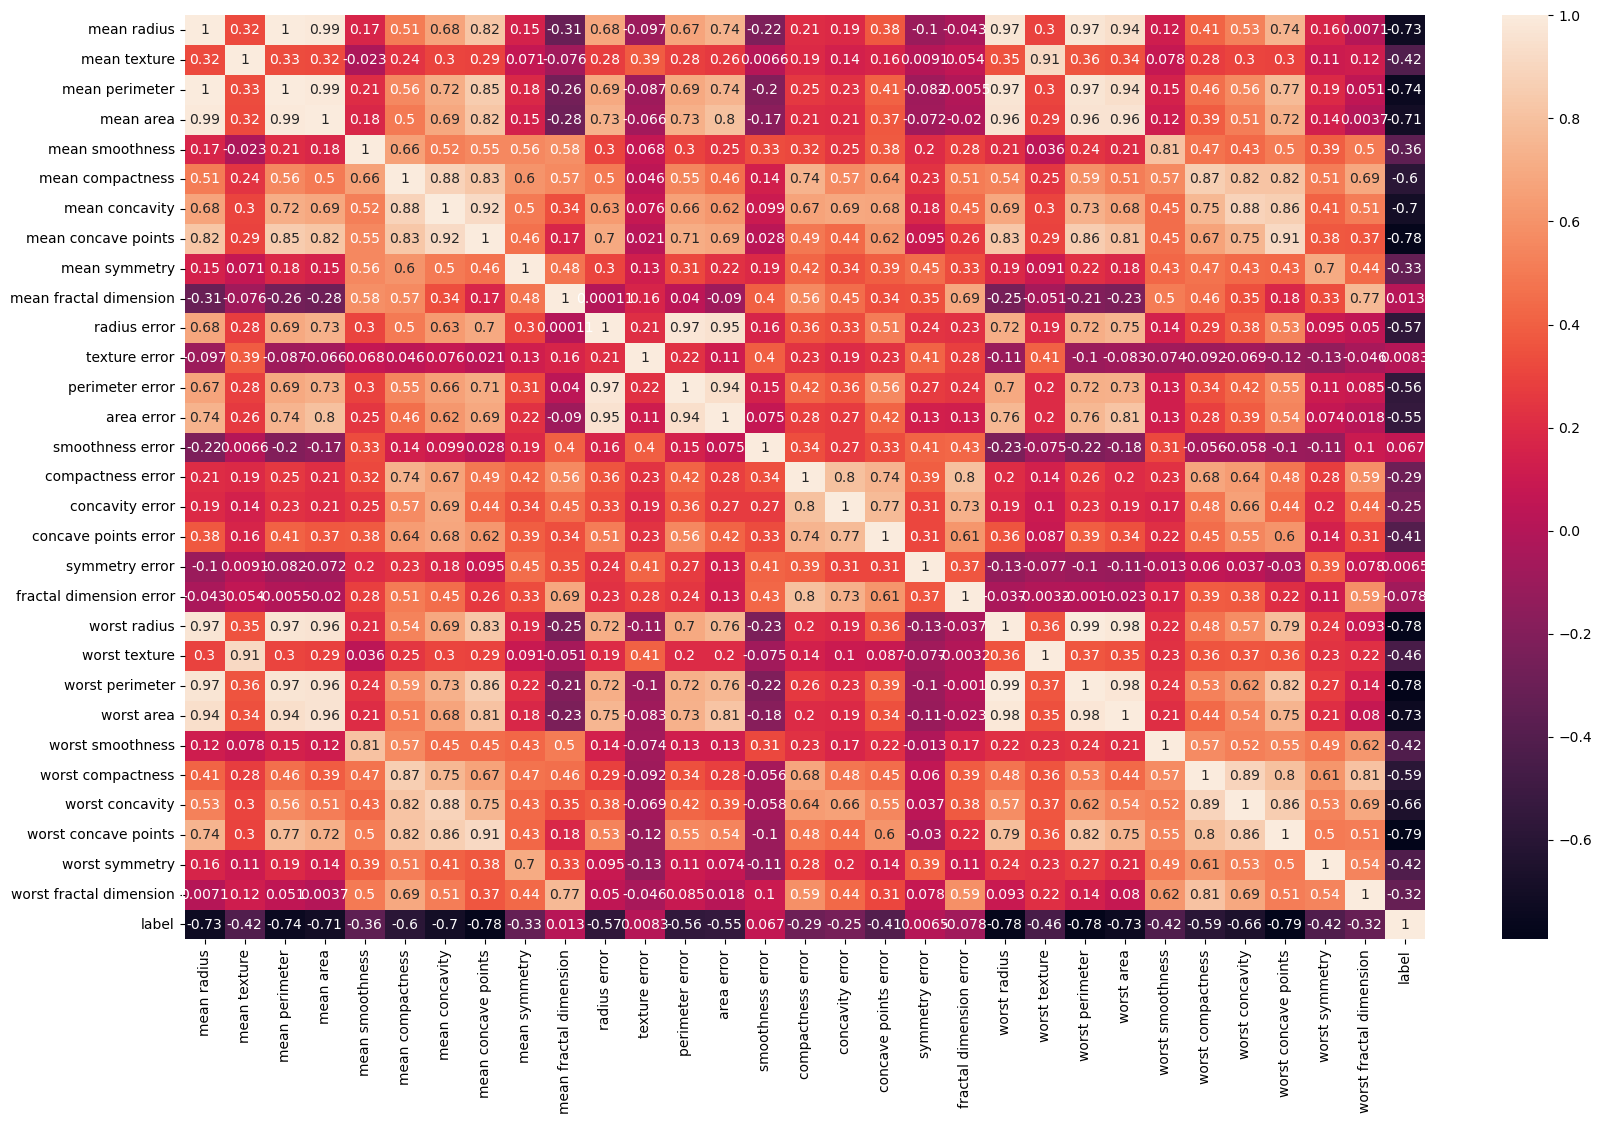

In [29]:
plt.figure(figsize=(20,12))
sns.heatmap(data_frame.corr(), annot = True)

In [ ]:
#Model testing and Training
# y denotes the the feature we are trying to predict
# X pricts the which are the remaining columns
# So for that firstly we have to drop the label columns because we are trying to predict the label column only and for that we ahve to drop it first

In [33]:
X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']

In [34]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [35]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [38]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [51]:
print('the size of our "X" is', X.shape)
print('\n')
print('the size of our training "X" (input features) is', X_train.shape)
print('\n')
print('the size of our testing "X" (input features) is',X_test.shape)

the size of our "X" is (569, 30)


the size of our training "X" (input features) is (455, 30)


the size of our testing "X" (input features) is (114, 30)


In [52]:
print('the size of our "Y" is', Y.shape)
print('\n')
print('the size of our training "Y" (input features) is', Y_train.shape)
print('\n')
print('the size of our testing "Y" (input features) is',Y_test.shape)

the size of our "Y" is (569,)


the size of our training "Y" (input features) is (455,)


the size of our testing "Y" (input features) is (114,)


In [55]:
svc_model = SVC()

In [58]:
svc_model.fit(X_train, Y_train)

SVC()

In [59]:
y_predict = svc_model.predict(X_test)

In [ ]:
# Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). 
# We are going to use confusion matrix for this comparison.

In [62]:
cm = np.array(confusion_matrix(Y_test,y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['is_cancer', 'is_healthy'],
                        columns = ['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,65,4
is_healthy,7,38


<AxesSubplot:>

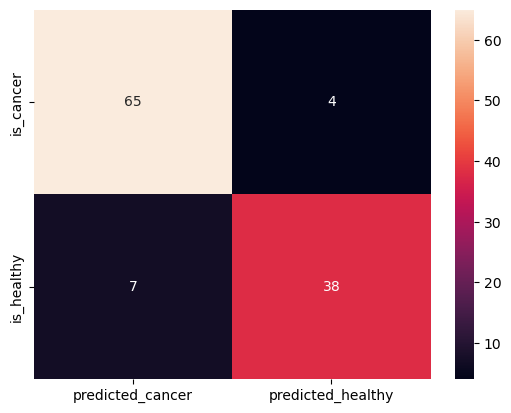

In [63]:
# Visualization on HeatMap
sns.heatmap(confusion, annot = True)

In [64]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.90      0.94      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [ ]:
# As we can see, our model did not do a good job in its predictions. 
# It predicted that 45 healthy patients have cancer. We only achieved 34% accuracy!

In [ ]:
# Improving our model
# First step is to normalize the data

In [65]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.023440
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.116700
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.003012
concavity error              0.000000
concave points error         0.000000
symmetry error               0.009947
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [66]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09575
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.30380
concave points error          0.04090
symmetry error                0.07895
fractal dimension error       0.02286
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [67]:
X_train_range = (X_train_max-X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 29.570000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.110770
mean compactness              0.321960
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.187300
mean fractal dimension        0.045790
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.132388
concavity error               0.303800
concave points error          0.040900
symmetry error                0.069003
fractal dimension error       0.021965
worst radius                 28.110000
worst texture                37.520000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [68]:
X_train_scaled = (X_train-X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
560,0.334564,0.589787,0.328865,0.193807,0.421233,0.276929,0.104545,0.213917,0.197544,0.256606,...,0.262184,0.563699,0.247971,0.128170,0.349534,0.193178,0.105911,0.361006,0.163590,0.183860
428,0.196365,0.233683,0.184369,0.100785,0.260720,0.046279,0.032076,0.068091,0.183663,0.251583,...,0.133404,0.220416,0.119229,0.057978,0.210196,0.033860,0.036581,0.139304,0.197219,0.102567
198,0.577358,0.432195,0.578467,0.426087,0.294304,0.370729,0.261012,0.336581,0.320342,0.116401,...,0.548915,0.534115,0.577668,0.369347,0.403024,0.516935,0.308706,0.588357,0.402023,0.242958
203,0.323205,0.474806,0.330108,0.192704,0.719238,0.476332,0.365042,0.456064,0.578751,0.529592,...,0.400925,0.795043,0.388914,0.237859,1.000000,0.478903,0.371086,0.693421,0.715297,0.350581
41,0.187846,0.393642,0.194251,0.096543,0.632572,0.305504,0.244611,0.281759,0.388681,0.409260,...,0.174671,0.621535,0.183326,0.080810,0.790662,0.235284,0.321326,0.490527,0.344121,0.268238


In [70]:
# Normalize training data
X_test_min = X_test.min()
X_test_range = (X_test-X_test_min).max()
X_test_scaled = (X_test-X_test_min)/X_test_range

In [ ]:
# Train our SVM model using (Normalize) dataset.

In [73]:
svc_model = SVC()
svc_model.fit(X_train_scaled, Y_train)

SVC()

In [74]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(Y_test,y_predict)

In [75]:
cm = np.array(confusion_matrix(Y_test,y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['is_cancer', 'is_healthy'],
                        columns = ['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,61,8
is_healthy,1,44


<AxesSubplot:>

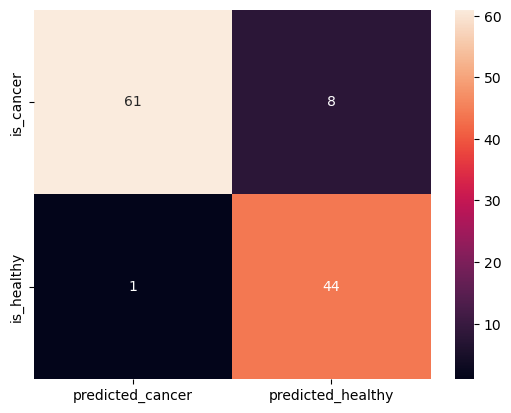

In [76]:
# Visualization on HeatMap
sns.heatmap(confusion, annot = True)

In [77]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.98      0.88      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [ ]:
# Achieved 98% accuracy!